In [6]:
#Load & Inspect the Dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Downloads\cars.csv")  
df.head()  

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [8]:
#Checking null values
df.isnull().sum()
#No null values

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64

In [9]:
#Check for duplicates
print(df.duplicated().sum())

18


In [10]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(5058, 18)

In [11]:
features=df.select_dtypes('number')
features.columns.tolist()

['Dimensions.Height',
 'Dimensions.Length',
 'Dimensions.Width',
 'Engine Information.Number of Forward Gears',
 'Fuel Information.City mpg',
 'Fuel Information.Highway mpg',
 'Identification.Year',
 'Engine Information.Engine Statistics.Horsepower',
 'Engine Information.Engine Statistics.Torque']

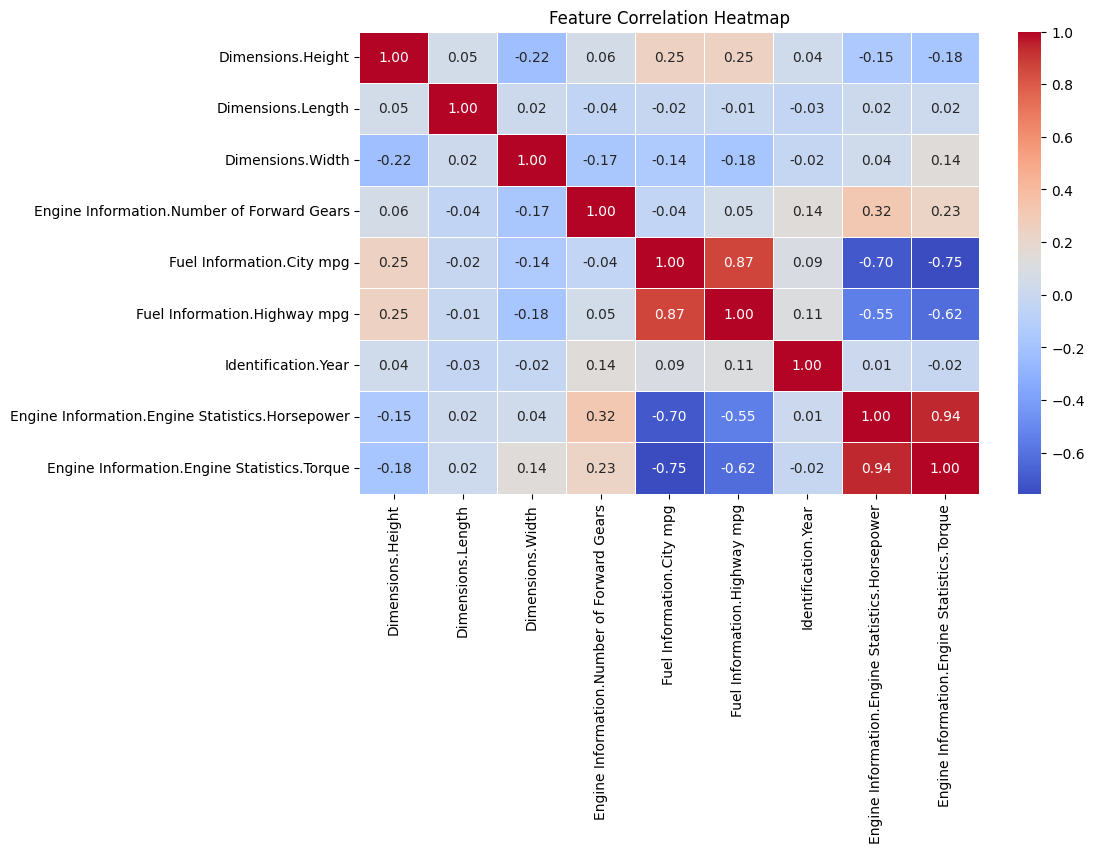

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting the final independent variables
selected_features = ["Dimensions.Height", "Engine Information.Engine Statistics.Torque"]

X = df[selected_features]

# Add a constant column for VIF calculation
X= sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results to check multi collinarity
print(vif_data)


                                       Feature        VIF
0                                        const  16.763410
1                            Dimensions.Height   1.034606
2  Engine Information.Engine Statistics.Torque   1.034606


In [15]:
df=df[["Dimensions.Height", "Engine Information.Engine Statistics.Torque",
       "Fuel Information.City mpg"]]
df.head()

,Dimensions.Height,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg
0,140,236,18
1,140,207,22
2,140,207,21
3,140,207,21
5,91,243,16


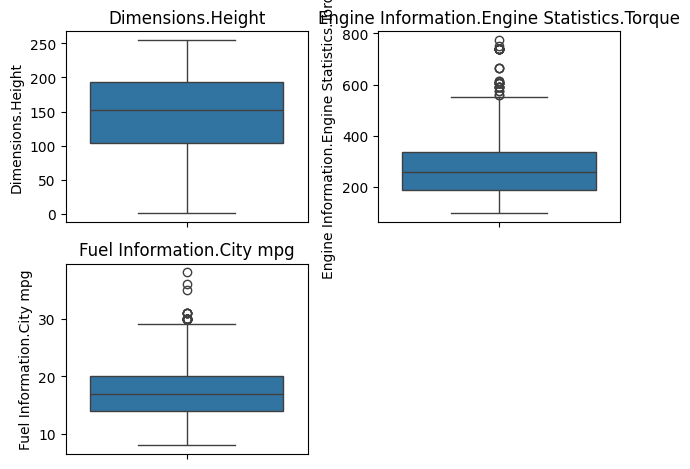

In [16]:
#Checking for outliers
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [17]:
#To remove outliers
outlier_feature = ["Engine Information.Engine Statistics.Torque",
       "Fuel Information.City mpg"]
def outlier_removal(df):
    df_filtered = df.copy()
    for i in outlier_feature:
        q1 = df_filtered[i].quantile(0.25)
        q3 = df_filtered[i].quantile(0.75)
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR

        # Remove outliers
        df_filtered = df_filtered[(df_filtered[i] <= upper_limit) & (df_filtered[i] >= lower_limit)]
    return df_filtered
cleaned_data = outlier_removal(df)
cleaned_data.shape


(4986, 3)

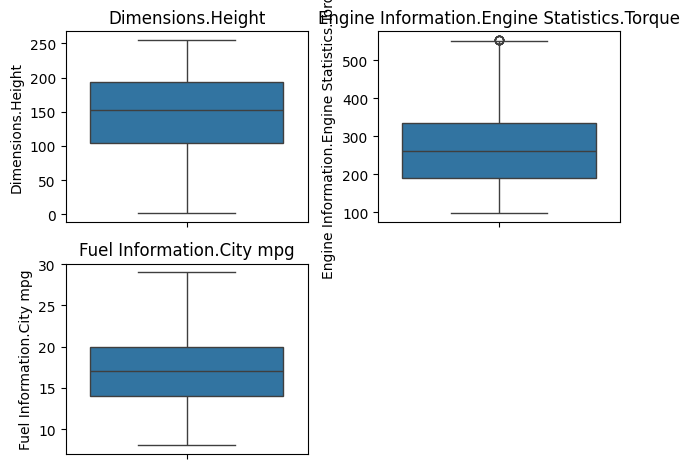

In [19]:
for i, col in enumerate(cleaned_data.columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=cleaned_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [20]:
selected_feature = ["Engine Information.Engine Statistics.Torque",
       "Fuel Information.City mpg"]
target = "Fuel Information.City mpg"
X = cleaned_data[selected_feature]
y = cleaned_data[target]

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#To scale the data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
import pandas as pd

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# View the first few rows
X_train_scaled_df.head() # View first 5 rows of scaled training data
X_test_scaled_df.head()  # View first 5 rows of scaled test data


,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg
0,0.028571,0.857143
1,0.173626,0.904762
2,0.063736,0.761905
3,0.140659,0.523810
4,0.400000,0.523810


In [24]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(selected_feature, model.coef_)))


Intercept: 8.000000000000037
Coefficients: {'Engine Information.Engine Statistics.Torque': np.float64(-3.654062631904262e-14), 'Fuel Information.City mpg': np.float64(20.99999999999995)}


In [26]:
# Predicting values
y_pred = model.predict(X_test)


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metraics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


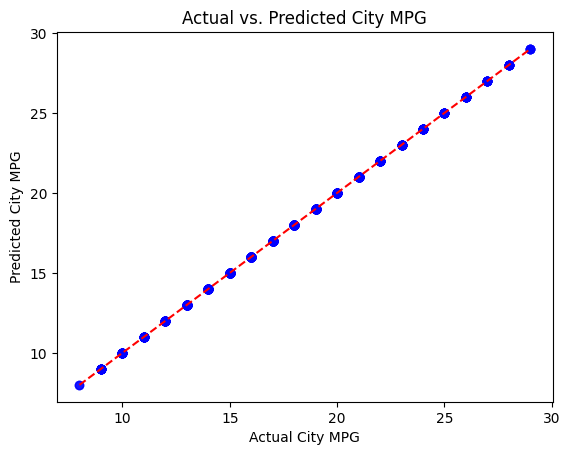

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Perfect prediction line
plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs. Predicted City MPG")
plt.show()


In [29]:
import pandas as pd

# Convert back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=selected_features)  # Use actual feature names
y_train_series = pd.Series(y_train, name=target)  # Ensure y_train has a name

# Now check
print(X_train_df.columns)  # Now works!
print(y_train_series.name)  # Now works!


Index(['Dimensions.Height', 'Engine Information.Engine Statistics.Torque'], dtype='object')
Fuel Information.City mpg
